In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

nb_years = 12
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
from_date = (datetime.today() - timedelta(days=365*nb_years)).strftime('%Y-%m-%d')

file_path = f"../dataset/CAC40_closing_prices_{from_date}_to_{yesterday}.csv"
print(f"Loading data from {file_path}")
data = pd.read_csv(file_path)

# Data preprocessing
stock_name = 'ENGI.PA'  # Remplacez par le nom du stock souhaité
if stock_name in data.columns:  # Vérifiez que la colonne existe
    stock_data = data[stock_name]
stock_data.drop(columns=['Date'], inplace=True)


Loading data from ../dataset/CAC40_closing_prices_2013-03-31_to_2025-03-27.csv


In [5]:
# plt.figure(figsize=(15, 15))
# num_stocks = len(data.columns)

# # Calculate grid size
# rows = int(np.ceil(np.sqrt(num_stocks)))
# cols = int(np.ceil(num_stocks / rows))

# for i, stock_name_display in enumerate(data.columns, 1):
#     plt.subplot(rows, cols, i)
#     plt.plot(data[stock_name_display].values, label=stock_name_display)
#     plt.title(stock_name_display, fontsize=10)
#     plt.xlabel("Time Steps", fontsize=8)
#     plt.ylabel("Close Value", fontsize=8)
#     plt.legend(fontsize=8)
#     plt.grid(True, linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

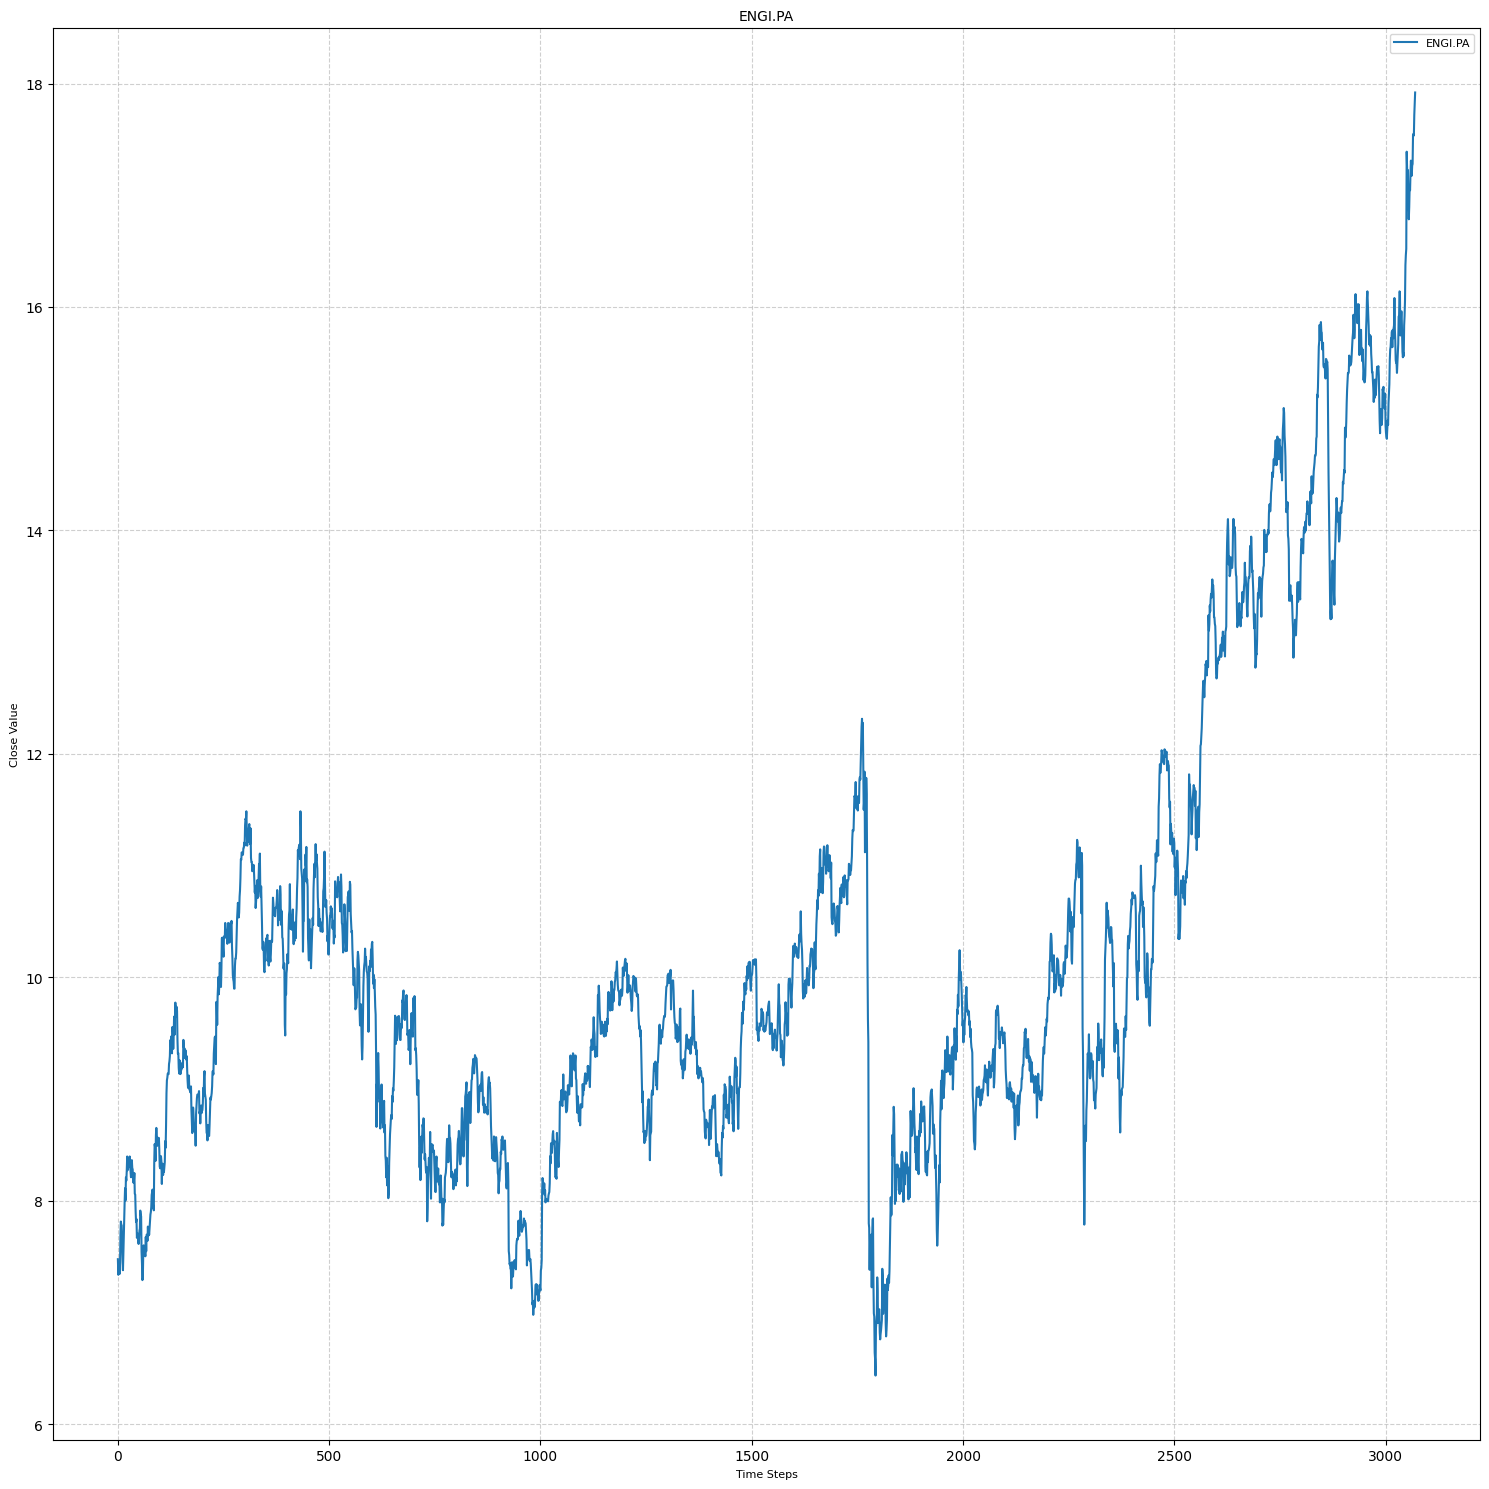

In [6]:
plt.figure(figsize=(15, 15))


plt.plot(stock_data.values, label=stock_name)
plt.title(stock_name, fontsize=10)
plt.xlabel("Time Steps", fontsize=8)
plt.ylabel("Close Value", fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
scaled_data = scaler.fit_transform(stock_data.values.reshape(-1, 1))
scaled_data

array([[0.09070251],
       [0.0785428 ],
       [0.08357439],
       ...,
       [0.98258637],
       [0.99042249],
       [1.        ]])

In [9]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [10]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)
X[0], y[0]

(array([0.09070251, 0.0785428 , 0.08357439, 0.08650949, 0.07917178,
        0.08713839, 0.10894183, 0.12005312, 0.11753747, 0.11711814,
        0.10055595, 0.08839632, 0.08210696, 0.09636305, 0.10726475,
        0.12340774, 0.13556725, 0.14605366, 0.1364411 , 0.15435543,
        0.15195233, 0.15981718, 0.17074059, 0.16003572, 0.16090949,
        0.16877434, 0.1626572 , 0.16702663, 0.17074059, 0.16396798,
        0.15894324, 0.15457398, 0.16527884, 0.16790074, 0.16178335,
        0.16069111, 0.15151532, 0.15020454, 0.1521708 , 0.15785093,
        0.14168414, 0.14102892, 0.12792087, 0.11961897, 0.12202211,
        0.10738473, 0.10978787, 0.11066177, 0.10454459, 0.10257829,
        0.10607399, 0.11284657, 0.11459444, 0.12857622, 0.12573615,
        0.12398844, 0.09646119, 0.08750411, 0.07439598, 0.07614377,
        0.09449511, 0.1014861 , 0.09711667, 0.09427664, 0.0979906 ,
        0.09296578, 0.10804016, 0.09689816, 0.10978787, 0.10978787,
        0.10498168, 0.11612339, 0.10891389, 0.11

In [11]:
train_size = int(len(X) * 0.6)  # 60% for training
val_size = int(len(X) * 0.2)    # 20% for validation and keep 20% for testing

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (1782, 100) (1782,)
Validation data shape: (594, 100) (594,)
Test data shape: (594, 100) (594,)


In [12]:
# Setup GPU usage

import tensorflow as tf


print("Available devices:", tf.config.list_physical_devices())

if tf.config.list_physical_devices('GPU'):
    print("Training on GPU...")
else:
    print("GPU not available. Training on CPU...")

2025-03-28 13:52:38.971235: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 13:52:39.114988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743166359.170229    8008 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743166359.185298    8008 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743166359.314467    8008 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Training on GPU...


Finding best hyperparameters

In [13]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, LSTM

def build_model(hp):
    model = Sequential()
    # Tune the number of LSTM units
    lstm_units = hp.Int('lstm_units', min_value=128, max_value=256, step=32)
    dense_units = hp.Int('dense_units', min_value=64, max_value=128, step=32)
    activation_function = hp.Choice('activation_function', values=['tanh']) # Remove the 'relu' option because never used

    model.add(LSTM(units=lstm_units, activation=activation_function, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(units=lstm_units, activation=activation_function))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Use Keras Tuner to find the best hyperparameters
with tf.device('/GPU:0'):
    tuner = kt.Hyperband(
        build_model,
        objective='val_loss',
        max_epochs=20,
        factor=3,
        directory='tuner_results',
        project_name=f'stock_prediction_{stock_name}'
    )

# Perform the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

I0000 00:00:1743166361.313996    8008 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4158 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Reloading Tuner from tuner_results/stock_prediction_ENGI.PA/tuner0.json
Best Hyperparameters: {'lstm_units': 256, 'dense_units': 96, 'activation_function': 'tanh', 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,273 (3.11 MB)

 Trainable params: 814,273 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveille la perte sur l'ensemble de validation
    patience=10,         # Arrête après 10 epochs sans amélioration
    restore_best_weights=True  # Restaure les poids du meilleur modèle
)

with tf.device('/GPU:0'):
    history = best_model.fit(
        X_train, y_train,
        epochs=100,  # Nombre maximum d'epochs
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

Epoch 1/100


I0000 00:00:1743166363.810273    9230 cuda_dnn.cc:529] Loaded cuDNN version 90800


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0096 - mae: 0.0631 - val_loss: 0.0010 - val_mae: 0.0218
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8103e-04 - mae: 0.0182 - val_loss: 9.3034e-04 - val_mae: 0.0215
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.0297e-04 - mae: 0.0209 - val_loss: 7.5653e-04 - val_mae: 0.0189
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9926e-04 - mae: 0.0164 - val_loss: 6.6251e-04 - val_mae: 0.0180
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9845e-04 - mae: 0.0163 - val_loss: 6.5638e-04 - val_mae: 0.0189
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6302e-04 - mae: 0.0155 - val_loss: 5.3364e-04 - val_mae: 0.0164
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5412e-04 - mae: 0.0139 - val_loss: 4.6419e-04 - val_mae: 0.0152
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3057e-04 - mae: 0.0132 - val_loss: 4.2362e-04 - val_mae: 0.0144
Epoch 9/100


In [15]:
test_loss = best_model.evaluate(X_test, y_test)
test_loss

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5561e-04 - mae: 0.0126


[0.00041388056706637144, 0.016443420201539993]

In [16]:
predictions = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [17]:
original_data = stock_data.values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

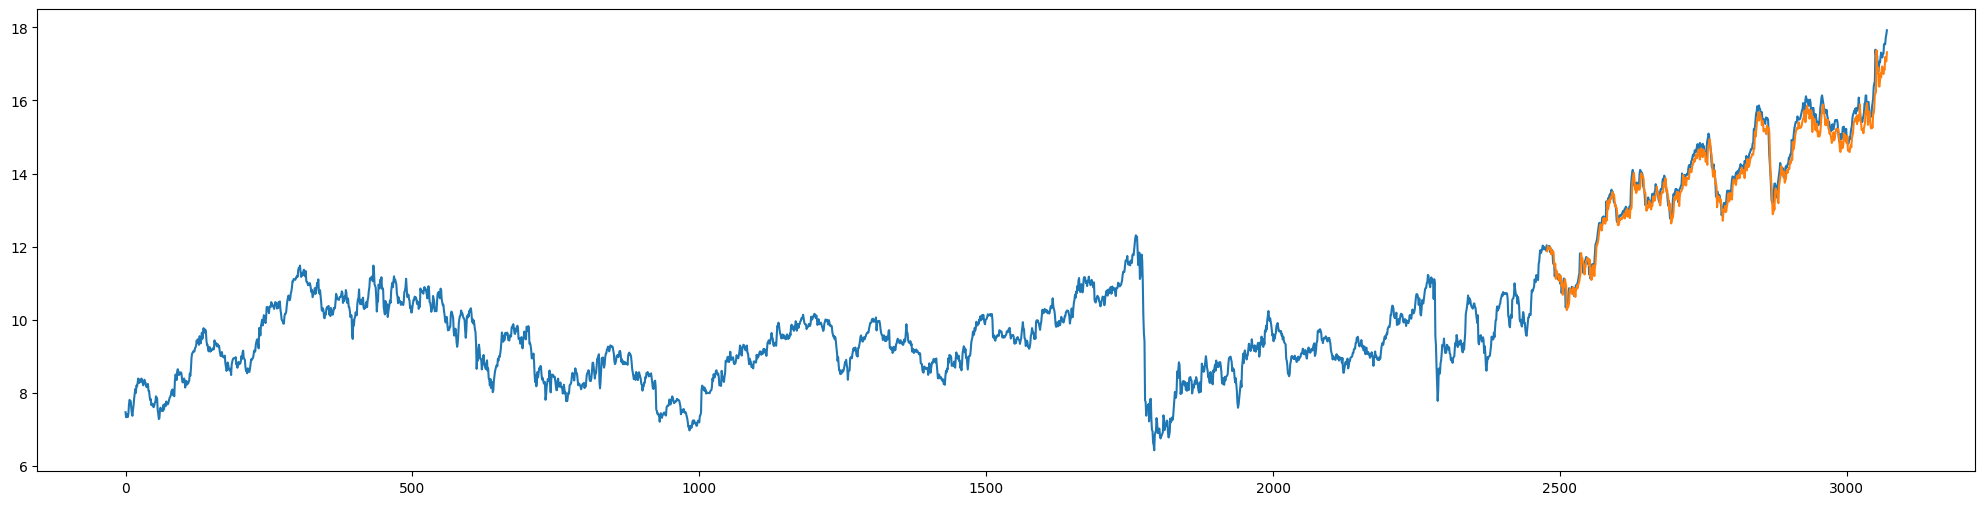

In [18]:
plt.figure(figsize=(25, 6))
plt.plot(original_data)
plt.plot(predicted_data)

In [19]:
validation_days = 26
new_predictions = best_model.predict(X_test[-validation_days:])
new_predictions = scaler.inverse_transform(new_predictions)
predicted_data = np.append(predicted_data, new_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


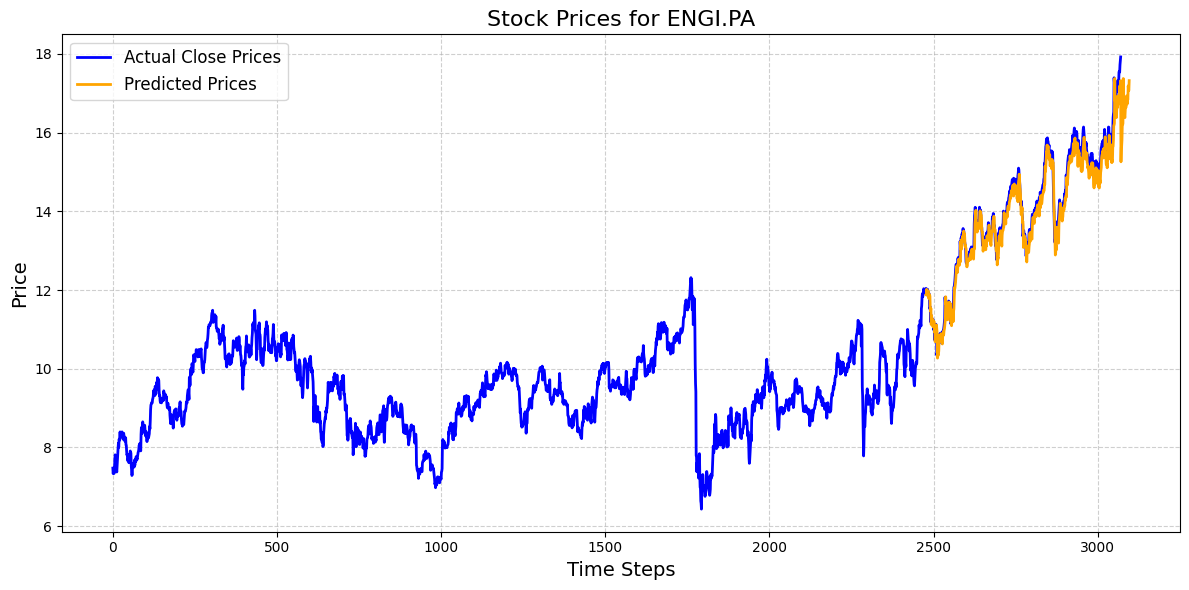

In [20]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the entire Actual Close Prices in blue
plt.plot(stock_data.values, label='Actual Close Prices', color='blue', linewidth=2)

# Plot the Predicted Prices in orange
plt.plot(predicted_data, label='Predicted Prices', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Stock Prices for {stock_name}", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

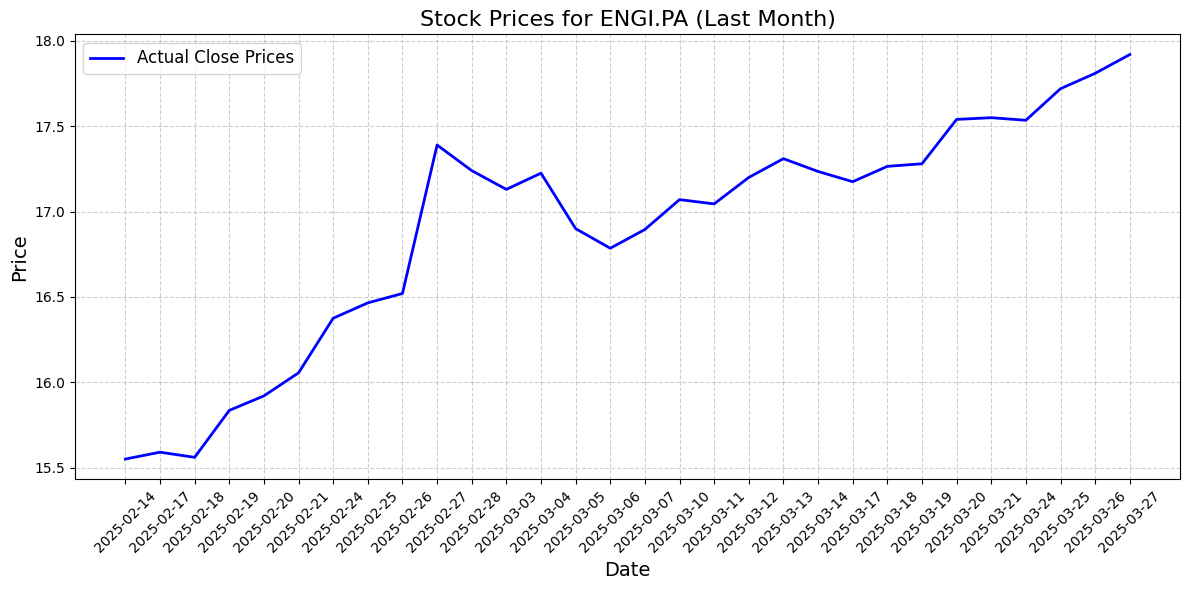

In [26]:
# Extract the last month's data
last_month_data = stock_data[-30:]  # Assuming 30 days in the last month
last_month_dates = data['Date'][-30:]  # Extract corresponding dates

plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the actual close prices for the last month
plt.plot(last_month_dates, last_month_data.values, label='Actual Close Prices', color='blue', linewidth=2)

# Add labels, title, and legend
plt.title(f"Stock Prices for {stock_name} (Last Month)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability

# Format the x-axis to display dates nicely
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

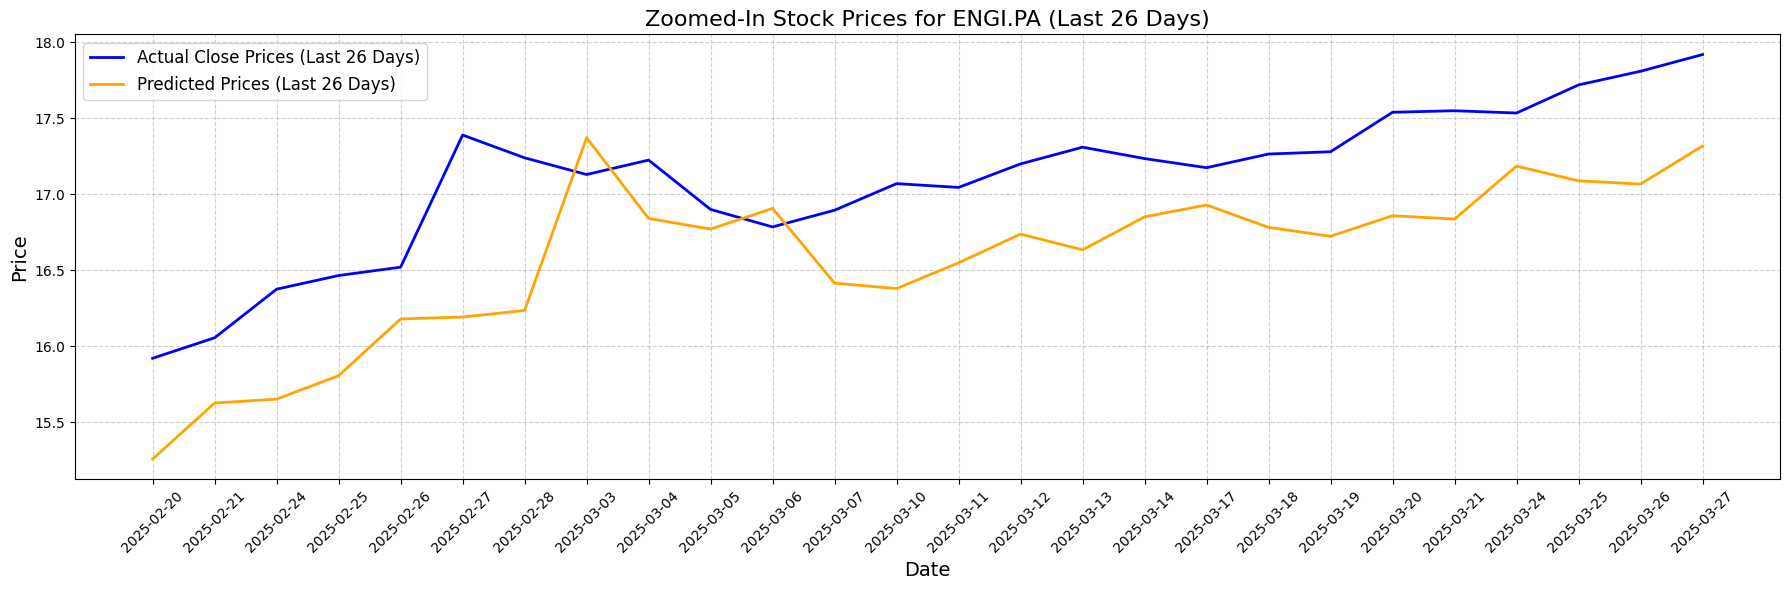

In [22]:
import matplotlib.dates as mdates

# Extract the last (validation_days) dates from the original dataset
dates = data['Date'][-validation_days:]  # Assuming stock_data has a DateTime index
# print(dates)

plt.figure(figsize=(18, 6))  # Set the figure size

# Plot the last (validation_days + 10) days of Actual Close Prices in blue
plt.plot(dates, stock_data.values[-validation_days:], label=f'Actual Close Prices (Last {validation_days} Days)', color='blue', linewidth=2)

# Plot the last validation_days of Predicted Prices in orange
plt.plot(dates[-validation_days:], predicted_data[-validation_days:], label=f'Predicted Prices (Last {validation_days} Days)', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Zoomed-In Stock Prices for {stock_name} (Last {validation_days} Days)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability

# Format the x-axis to display dates nicely

plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [23]:
# Parameters
initial_money = 100  # Initial virtual money
threshold = 0.01  # Threshold for buying/selling (1%)

# Initialize variables
money = initial_money
stocks_owned = 0
money_over_time = []  # To track the evolution of money over time

# Limit the simulation to 365 days
months = 12
days_to_simulate = months*30
limited_predictions = predictions[:days_to_simulate]

# Iterate through predictions
for i in range(len(limited_predictions) - 1):
    current_predicted_price = limited_predictions[i][0]
    next_predicted_price = limited_predictions[i + 1][0]
    actual_price = stock_data.iloc[len(stock_data) - len(predictions) + i]  # Actual price for the current day

    # Buy condition
    if next_predicted_price > current_predicted_price * (1 + threshold):
        # Buy stocks with all available money
        initial_money_current = money
        stocks_to_buy = money // actual_price
        money -= stocks_to_buy * actual_price
        stocks_owned += stocks_to_buy
        print(f"Buying:\n\tinitial_money: {initial_money_current}€\n\tfinal_money: {money}€\n\tactual_price: {actual_price}€\n\tnb_bought: {stocks_to_buy}")

    # Sell condition
    elif next_predicted_price < current_predicted_price * (1 - threshold):
        # Sell all owned stocks
        initial_money_current = money
        money += stocks_owned * actual_price
        print(f"Selling:\n\tinitial_money: {initial_money_current}€\n\tfinal_money: {money}€\n\tactual_price: {actual_price}€\n\tnb_sold: {stocks_owned}")
        stocks_owned = 0

    # Track money over time
    money_over_time.append(money + stocks_owned * actual_price)

# Final value of portfolio
final_value = money + stocks_owned * stock_data.iloc[-1]

print(f"Initial money: {initial_money}")
print(f"Final portfolio value after {days_to_simulate} days: {final_value}")

Buying:
	initial_money: 100€
	final_money: 3.9019317626953125€
	actual_price: 12.012258529663086€
	nb_bought: 8.0
Selling:
	initial_money: 3.9019317626953125€
	final_money: 99.32334899902344€
	actual_price: 11.927677154541016€
	nb_sold: 8.0
Selling:
	initial_money: 99.32334899902344€
	final_money: 99.32334899902344€
	actual_price: 11.519695281982422€
	nb_sold: 0
Selling:
	initial_money: 99.32334899902344€
	final_money: 99.32334899902344€
	actual_price: 11.373749732971191€
	nb_sold: 0
Buying:
	initial_money: 99.32334899902344€
	final_money: 9.009994506835938€
	actual_price: 11.289169311523438€
	nb_bought: 8.0
Selling:
	initial_money: 9.009994506835938€
	final_money: 98.77936553955078€
	actual_price: 11.221171379089355€
	nb_sold: 8.0
Buying:
	initial_money: 98.77936553955078€
	final_money: 9.965278625488281€
	actual_price: 11.101760864257812€
	nb_bought: 8.0
Selling:
	initial_money: 9.965278625488281€
	final_money: 99.89385986328124€
	actual_price: 11.24107265472412€
	nb_sold: 8.0
Buying

In [24]:
# Parameters
initial_money = 1000  # Initial virtual money
threshold = 0.01  # Threshold for buying/selling (1%)
target_profit = 0.05  # Target profit (5%)
stop_loss = 0.10  # Stop-loss (10%)

# Initialize variables
money = initial_money
stocks_owned = 0
buying_price = None  # Track the buying price for stop-loss and target profit
money_over_time = []  # To track the evolution of money over time

# Limit the simulation to 365 days
months = 12
days_to_simulate = min(len(predictions), months * 30)
limited_predictions = predictions[:days_to_simulate]

# Iterate through predictions
for i in range(len(limited_predictions) - 1):
    current_predicted_price = limited_predictions[i][0]
    next_predicted_price = limited_predictions[i + 1][0]
    actual_price = stock_data.iloc[len(stock_data) - len(predictions) + i]  # Actual price for the current day

    # Buy condition
    if next_predicted_price > current_predicted_price * (1 + threshold) and stocks_owned == 0:
        # Buy stocks with all available money
        stocks_to_buy = money // actual_price
        money -= stocks_to_buy * actual_price
        stocks_owned += stocks_to_buy
        buying_price = actual_price  # Record the buying price
        print(f"Buying:\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Bought: {stocks_to_buy}")

    # Sell condition: Target profit or stop-loss
    elif stocks_owned > 0:
        # Check target profit
        if actual_price >= buying_price * (1 + target_profit):
            money += stocks_owned * actual_price
            print(f"Selling (Target Profit):\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Sold: {stocks_owned}")
            stocks_owned = 0
            buying_price = None  # Reset buying price

        # Check stop-loss
        elif actual_price <= buying_price * (1 - stop_loss):
            money += stocks_owned * actual_price
            print(f"Selling (Stop-Loss):\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Sold: {stocks_owned}")
            stocks_owned = 0
            buying_price = None  # Reset buying price

    # Track money over time
    money_over_time.append(money + stocks_owned * actual_price)

# Final value of portfolio
final_value = money + stocks_owned * stock_data.iloc[-1]

print(f"Initial money: {initial_money}€")
print(f"Final portfolio value after {days_to_simulate} days: {final_value}€")

Buying:
	Money: 2.982542037963867€
	Actual Price: 12.012258529663086€
	Stocks Bought: 83.0
Selling (Stop-Loss):
	Money: 894.0075397491455€
	Actual Price: 10.735240936279297€
	Stocks Sold: 83.0
Buying:
	Money: 10.347763061523551€
	Actual Price: 10.909379959106444€
	Stocks Bought: 81.0
Selling (Target Profit):
	Money: 967.4891061782837€
	Actual Price: 11.81655979156494€
	Stocks Sold: 81.0
Buying:
	Money: 9.54671573638916€
	Actual Price: 11.68222427368164€
	Stocks Bought: 82.0
Selling (Target Profit):
	Money: 1024.4706354141235€
	Actual Price: 12.377120971679688€
	Stocks Sold: 82.0
Buying:
	Money: 0.02711582183860628€
	Actual Price: 12.493213653564451€
	Stocks Bought: 82.0
Selling (Target Profit):
	Money: 1085.7203912734985€
	Actual Price: 13.240161895751951€
	Stocks Sold: 82.0
Buying:
	Money: 11.2460298538208€
	Actual Price: 13.10334587097168€
	Stocks Bought: 82.0
Selling (Target Profit):
	Money: 1150.1918840408325€
	Actual Price: 13.889583587646484€
	Stocks Sold: 82.0
Buying:
	Money: 0.

In [25]:
# Parameters
initial_money = 100  # Initial virtual money
threshold = 0.01  # Threshold for buying/selling (1%)
target_profit = 0.05  # Target profit (5%)
stop_loss = 0.10  # Stop-loss (10%)

# Limit the simulation to 365 days
months = 12
days_to_simulate = min(len(predictions), months * 30)
limited_predictions = predictions[:days_to_simulate]

def simulate_strategy(threshold, target_profit, stop_loss):
    money = initial_money
    stocks_owned = 0
    buying_price = None  # Track the buying price for stop-loss and target profit
    money_over_time = []  # To track the evolution of money over time

    # Iterate through predictions
    for i in range(len(limited_predictions) - 1):
        current_predicted_price = limited_predictions[i][0]
        next_predicted_price = limited_predictions[i + 1][0]
        actual_price = stock_data.iloc[len(stock_data) - len(predictions) + i]  # Actual price for the current day

        # Buy condition
        if next_predicted_price > current_predicted_price * (1 + threshold) and stocks_owned == 0:
            # Buy stocks with all available money
            stocks_to_buy = money // actual_price
            money -= stocks_to_buy * actual_price
            stocks_owned += stocks_to_buy
            buying_price = actual_price  # Record the buying price
            #print(f"Buying:\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Bought: {stocks_to_buy}")

        # Sell condition: Target profit or stop-loss
        elif stocks_owned > 0:
            # Check target profit
            if actual_price >= buying_price * (1 + target_profit):
                money += stocks_owned * actual_price
                #print(f"Selling (Target Profit):\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Sold: {stocks_owned}")
                stocks_owned = 0
                buying_price = None  # Reset buying price

            # Check stop-loss
            elif actual_price <= buying_price * (1 - stop_loss):
                money += stocks_owned * actual_price
                #print(f"Selling (Stop-Loss):\n\tMoney: {money}€\n\tActual Price: {actual_price}€\n\tStocks Sold: {stocks_owned}")
                stocks_owned = 0
                buying_price = None  # Reset buying price

        # Track money over time
        money_over_time.append(money + stocks_owned * actual_price)

    # Final value of portfolio
    final_value = money + stocks_owned * stock_data.iloc[-1]

    print(f"\nConfig: Threshold={threshold}, Target Profit={target_profit}, Stop Loss={stop_loss}")
    print(f"Initial money: {initial_money}€")
    print(f"Final portfolio value after {days_to_simulate} days: {final_value}€\n")
    return final_value


thresholds = [i/10000 for i in range(0, 305, 5)]  # 0%, ..., 0.03%
target_profits = [i/100 for i in range(2, 11, 1)]  # 2%, ..., 10%
stop_losses = [i/100 for i in range(3, 21, 1)]  # 3%, ..., 20%

best_config = None
best_final_value = 0

for threshold in thresholds:
    for target_profit in target_profits:
        for stop_loss in stop_losses:
            # Simulate the strategy with the current configuration
            money, stocks_owned = initial_money, 0
            final_value = simulate_strategy(threshold, target_profit, stop_loss)  # Implement this function
            if final_value > best_final_value:
                best_final_value = final_value
                best_config = (threshold, target_profit, stop_loss)

print(f"Best Configuration: Threshold={best_config[0]}, Target Profit={best_config[1]}, Stop Loss={best_config[2]}\n\tWith Final Value: {best_final_value}€\n\tBenefits: {best_final_value - initial_money}€\n\tProfit Ratio: {((best_final_value - initial_money) / initial_money) * 100:.2f}%")



Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.03
Initial money: 100€
Final portfolio value after 360 days: 148.72042274475103€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.04
Initial money: 100€
Final portfolio value after 360 days: 138.63577175140387€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.05
Initial money: 100€
Final portfolio value after 360 days: 148.6050415039063€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.06
Initial money: 100€
Final portfolio value after 360 days: 146.707862854004€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.07
Initial money: 100€
Final portfolio value after 360 days: 149.48348236083993€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.08
Initial money: 100€
Final portfolio value after 360 days: 152.3200149536133€


Config: Threshold=0.0, Target Profit=0.02, Stop Loss=0.09
Initial money: 100€
Final portfolio value after 360 days: 134.82307243347174€


Config: Threshold=0.0, Target Profit=